# Domain:
○ Finance and Banking

### ● Model Building and saving the model using Pickle


1. Import required libraries and read the dataset. (2)

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Reading the dataset

df = pd.read_csv('loan_approval_data.csv')

2. Check the first few samples, shape, info of the data and try to familiarize
yourself with different features. (2)

In [3]:
#  Checking sample of dataset

df.head(n=5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [4]:
# Checking the shape of dataset

df.shape

(614, 13)

In [5]:
# Checking the info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [6]:
# Statistical analysis of numeric columns in dataset
df.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Statistical analysis of Categorical columns in dataset
df.describe(include="O")

,loan_id,gender,married,education,self_employed,property_area,loan_status
count,614,601,611,614,582,614,614
unique,614,2,2,2,2,3,2
top,lp001002,male,yes,graduate,no,semiurban,y
freq,1,489,398,480,500,233,422


3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. (2)

In [6]:
# Checking the Missing values in the dataset 

missing_values =df.isnull().sum()
print(missing_values[missing_values  > 0] )

gender              13
married              3
dependents          15
self_employed       32
loanamount          22
loan_amount_term    14
credit_history      50
dtype: int64


- There are multiple columns having null values.

In [7]:
# Checking columns with unique values

print("'Gender' columns has unique values --> ", df['gender'].unique())
print("'married' columns has unique values --> ", df['married'].unique())
print("'dependents' columns has unique values --> ", df['dependents'].unique())
print("'self_employed' columns has unique values --> ", df['self_employed'].unique())
print("'credit_history' columns has unique values --> ", df['credit_history'].unique())

'Gender' columns has unique values -->  ['male' 'female' nan]
'married' columns has unique values -->  ['no' 'yes' nan]
'dependents' columns has unique values -->  [ 0.  1.  2.  3. nan]
'self_employed' columns has unique values -->  ['no' 'yes' nan]
'credit_history' columns has unique values -->  [ 1.  0. nan]


In [8]:
# Imputing the null values with mode value.

df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['married'].fillna(df['married'].mode()[0], inplace=True)
df['dependents'].fillna(df['dependents'].mean(), inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace = True)
df['credit_history'].fillna(df['credit_history'].mean(), inplace = True)

In [9]:
# Checking more columns with unique values

print("'loan_amount_term' columns has unique values --> ", df['loan_amount_term'].unique())
print(' '*100)
print("'loanamount' columns has unique values -->")
print(' '*100)
print(df['loanamount'].value_counts())

'loan_amount_term' columns has unique values -->  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
                                                                                                    
'loanamount' columns has unique values -->
                                                                                                    
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: loanamount, Length: 203, dtype: int64


In [10]:
# Imputing the null values with mode value.

df['loanamount'].fillna(df['loanamount'].mean(), inplace = True)
df['loan_amount_term'].fillna(df['loan_amount_term'].mean(), inplace = True)

In [11]:
# Checking missing values after imputation

missing_values = df.isnull().sum()
print(missing_values)

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64


In [12]:
# Dropping the redundant feature from the dataset

df.drop('loan_id', axis=1, inplace=True)

In [13]:
# checking duplicates in dataset
df.duplicated().sum()

0

4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. (2)

In [14]:
# Group of categorical columns

cat_data = df.select_dtypes(include='O')
cat_data.columns

Index(['gender', 'married', 'education', 'self_employed', 'property_area',
       'loan_status'],
      dtype='object')

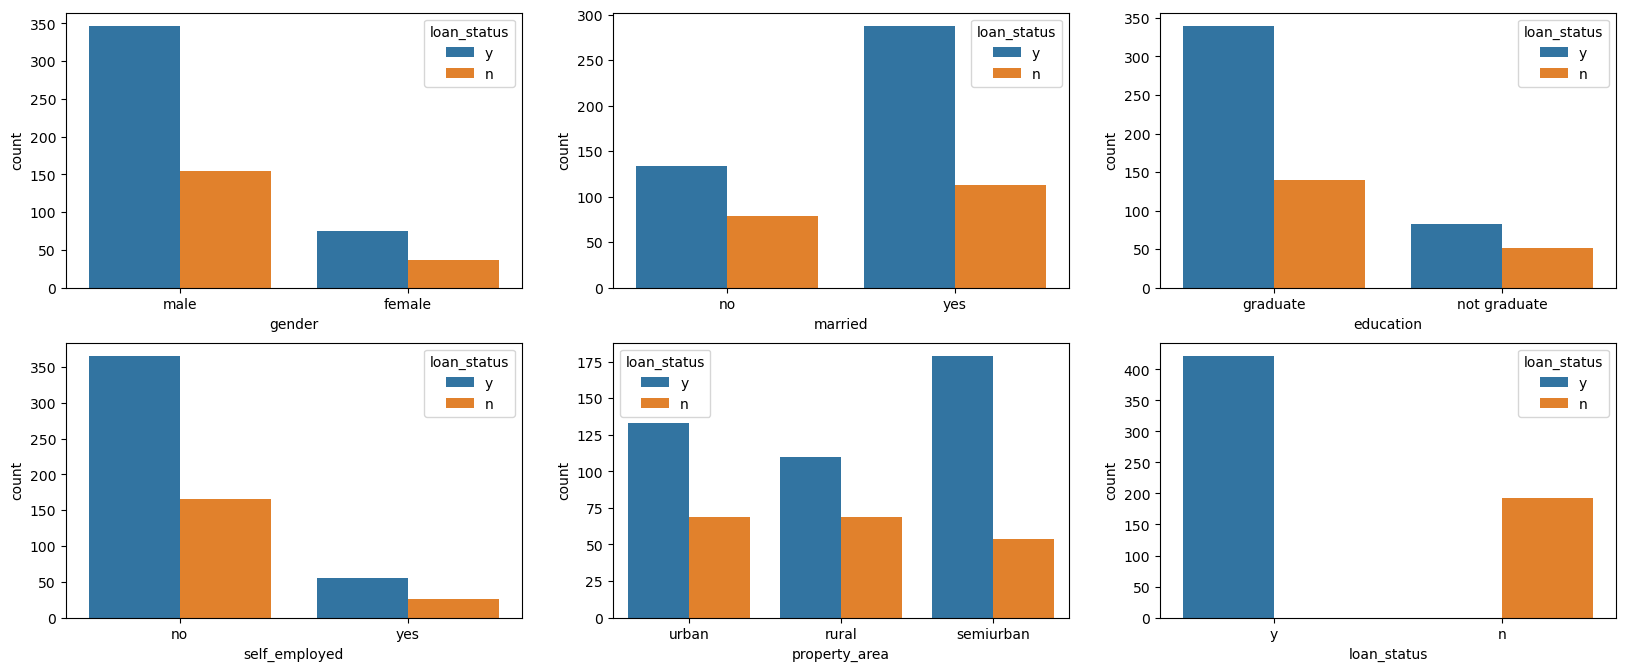

In [36]:
# Data visualization

plt.figure(figsize=(20,25))
for i,col in enumerate(cat_data):
    plt.subplot(6,3,i+1)
    sns.countplot(x=col,hue='loan_status',data=df)

- in both genders there is high possibility for loan approval however the no. of females are less than male.
- the percentage of loan approval in married category is higher than that in umarried category.
- gradutes , who apply for loan and get loan, are more than non-graduates
- there is a majority of loan approvals in not self-employed category.
- people live in semiurban area are the most applicant who get loan followed by urban and rural.

5. Encode the categorical data. (2)

In [16]:
# Encoding categorical data with label Encoder

le= LabelEncoder()

for col in cat_data:
    df[col] = le.fit_transform(df[col])

In [17]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


6. Separate the target and independent features and split the data into train and test. (2)

In [18]:
# dividing the dataset with target and independent columns.

X= df.drop('loan_status', axis=1)
y = df['loan_status']

In [31]:
# Splitting the dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25 ,random_state=6)

print("shape of training data y-train --> ", y_train.shape, "and X-train --> ", X_train.shape)
print("shape of test data y-test --> ", y_test.shape, " and  X-test --> ", X_test.shape)

shape of training data y-train -->  (460,) and X-train -->  (460, 11)
shape of test data y-test -->  (154,)  and  X-test -->  (154, 11)


7. Build any classification model to predict the loan status of the customer and save your model using pickle. (3)

In [32]:
# Random Forest Classifier 

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Making predictions on train and test datasets

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

accuracy_score_train = accuracy_score(y_train, y_train_pred)
accuracy_score_test = accuracy_score(y_test, y_test_pred)

print("accuracy score of train dataset --> ", accuracy_score_train)
print("accuracy score of test dataset --> ", accuracy_score_test)

accuracy score of train dataset -->  1.0
accuracy score of test dataset -->  0.8246753246753247


In [34]:
# Saving my model into model.pkl file

import pickle

pickle.dump(rf, open('model.pkl', 'wb'))